In [1]:
%%javascript

window.load_remote_theme = true;
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/HKSG/gh-pages/assets/';

window.load_local_theme = function(){
    var hostname = document.location.hostname;
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme);
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Data Science Methods I

* Machine Learning
* Exploratory Data Analysis
* Intermission : Levels of Measurement
* Regression
* Short Detour : Working with Numpy Arrays
* Challenge : Build your own regression model

![break](assets/theory.png)

## What _is_ Machine Learning?

> “Machine learning, a branch of artificial intelligence, is about the construction and study of
systems that can learn from data.”

<footer>~ Wikipedia</footer>

With machine learning we use _input_ variables to predict _output_ variables. That's it. But that's easier said than done …

Let's say we are data analysts working for Samsung and we are trying to figure out what's the best way to spend our stupedous marketing budget. How can we best predict _smartphone sales_ from the spend on our various channels? Samsung buys online advertising, runs billboard campaigns, and pays for product placement in TV shows. 

Let $Y$ be the output variable (e.g. sales), and $X$ the _vector_ of input variables $X1,X2,X3,\ldots$, then

$$ Y = f(X)+\epsilon$$

We want to work out what $f$ is. $\epsilon$ is unavoidable noise that is independent of $X$.

How do we estimate $f$ from the data, and how do we evaluate our estimate? That is a question machine learning can answer.

### Prediction and its limits

Once we have an estimate $\hat{f}$ for $f$, we can predict unavailable values of $Y$ for known values of $X$:

$$ \hat{Y} = \hat{f}(X) $$

How good an estimate of $Y$ is $\hat{Y}$? The difference between the two values can be partitioned into **reducible** and **irreducible** errors:

$$E(Y−\hat{Y})^{2}=[f(X)−\hat{f}(X)]^{2}+\sigma^{2}_{\epsilon}$$

where $[f(X)−f^(X)]^{2}$ is the reducible error.

### How to estimate $f$

Two main approaches:

#### Parametric

An assumption is made about the form of $f$. For example, the **linear model** states that

$$f^(X)=β_{0}+β_{1}X_{1}+β_{2}X_{2}+ \ldots +β_{p}X_{p}$$

Then we use the training data to choose the values of $β_{0},β_{1}, \ldots ,β^{p}$, the parameters.

* **Advantage**: Much easier to estimate parameters than whole function.
* **Disadvantage**: Our choice of the form of $f$ might be wrong, or even very wrong.

We can try to make our parametric form more **flexible** in order to reduce the risk of choosing the wrong $f$, but this also makes $\hat{f}$ more complex and potentially following the noise too closely, thereby **overfitting**.

#### Non-parametric

Just get $f$ as close as possible to the data points, subject to not being too wiggly or too unsmooth.

* **Advantage**: More likely to get $f$ right, especially if $f$ is weird.
* **Disadvantage**: Far more data is needed to obtain a good estimate for $f$.

#### Supervised vs unsupervised learning

What if we are only given input variables and no outputs? Then our learning will be **unsupervised**; we are blind.

What can we do? We can try to understand the relationship between the input variables or between the observations. One example is to cluster observations or variables together into groups.

> “The core of machine learning deals with representation and generalization...”

* representation – extracting structure from data
* generalization – making predictions from data

#### Regression vs classification

Variables can be either _quantitative_ or _qualitative_. We care about this because different variable types affect the class of values we can make predictions from and therefore the possible nature of $f$, and also how to measure the size of an error from a wrong prediction.

When the output variable is quantitative, prediction is called _regression_.
When the output variable is qualitative, prediction is _classification_.

### What is the goal of Machine Learning?

The goal is determined by the type of problem.

|Type   	|Use   	|Method |
|:-:	|:-:	|:-:	|
|Supervised   	|Making Predictions   	|Generalisation |
|Unsupervised   	|Extracting Structure   	|Representation |


![break](assets/theory.png)

## Exploratory Data Analysis

1. Summarize the main characteristics of datasets with Summary Statistics (Initial Data Analysis)
1. Visually inspect the structure and nature of the data
1. Find what the data can tell us beyond the formal modeling or hypothesis testing task.

### Let the visuals speak to you

Always explore your data visually. Whatever specific hypothesis you have when you go out to collect data is likely to be worse than any of the hypotheses you’ll form after looking at just a few simple visualizations of that data.

### Objectives

* **Quality of measurements**
* **Quality of data**
* **Initial transformations**
* **Univariate statistics** (single variable)
* **Bivariate associations** (correlations)
* **Multivarite patterns** (analysis)

### Dataset : Tips

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

    Source: Bryant, P. G. and Smith, M. A. (1995), Practical Data Analysis:
    Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

**What are the factors that affect tipping behavior?**

#### Load the Dataset

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [4]:
tips = sns.load_dataset("tips")

#### Inspect the variables

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [8]:
# info() is more informative than 'describe()' as
# it gives you the datatypes length of dataset
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [9]:
import random
# Look at a random sample of the rows
tips.ix[random.sample(tips.index,10)]

,total_bill,tip,sex,smoker,day,time,size
74,14.73,2.20,Female,No,Sat,Dinner,2
223,15.98,3.00,Female,No,Fri,Lunch,3
141,34.30,6.70,Male,No,Thur,Lunch,6
34,17.78,3.27,Male,No,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4
236,12.60,1.00,Male,Yes,Sat,Dinner,2
194,16.58,4.00,Male,Yes,Thur,Lunch,2
68,20.23,2.01,Male,No,Sat,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
156,48.17,5.00,Male,No,Sun,Dinner,6


In [10]:
# Inspect head and tail of the dataset

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


We look first at the variable of greatest interest to the waiter: tip. A common graph for looking at a single variable is the histogram, where data values are binned and the count is represented by a rectangular bar.

### Tip 1

> Start your exploration of a single parameter - usually you'd pick the more important one for your research question.

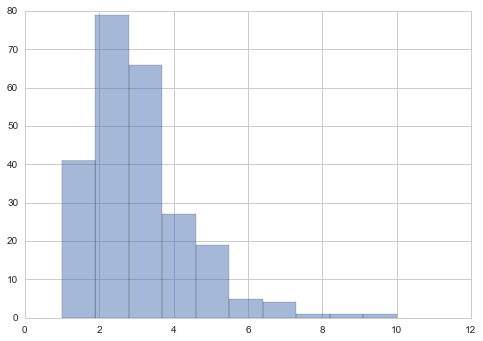

In [13]:
plt.hist(tips.tip, alpha=.5);

#### What happens if we change the bin size?

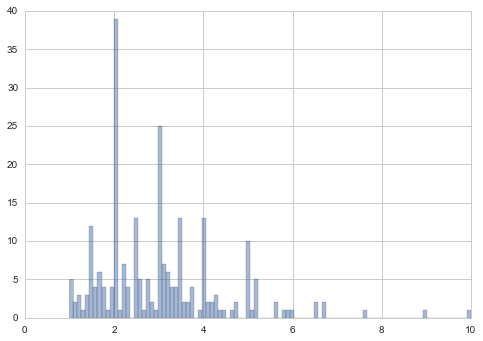

In [14]:
plt.hist(tips.tip, 100, alpha=.5);

The distribution appears to be unimodal; that is, it has one peak, the bar representing the tips greater than \$1.50 and less than or equal \$2.50. There are
very few tips of \$1.50 or less. The number of larger tips trails off rapidly, which suggests that this is not a very expensive restaurant.

The conclusions drawn from a histogram are often influenced by the choice of bin width, which is a parameter of the _graph_ and not of the _data_.


#### Tip 2

> Experiment with different bin-widths for you histograms - at low granulairty, you'll get a better idea of the overall distribution, at higher levels of granulairty you can inspect whether any 'clipping' is occuring. In other words, **a large bin width smooths out the graph and shows rough or global trends, whereas a smaller bin width highlights more local features**.


In [15]:
# draw a plot with 100 bins

In [16]:
# draw a plot with 20 bins

In [17]:
# draw a plot with 10 bins

In [18]:
# draw a plot with 5 bins

### Scatterplot

So far we have not addressed the primary question: What relationships exist between tip and the other variables? Since the tip is usually calculated
based on the bill, it is natural to look first at a graph of tip and bill. A common graph for looking at a pair of continuous variables is the scatterplot.

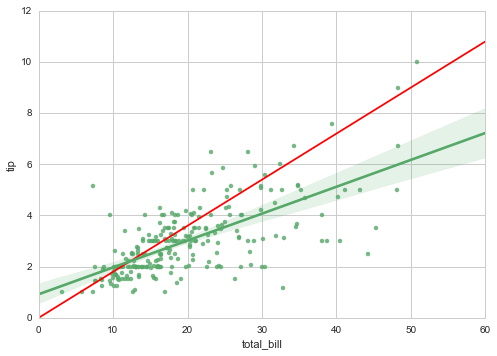

In [19]:
f, (ax) = plt.subplots(1, 1)
ax.plot([0, 1], [0, .9], c='r', transform=ax.transAxes)
sns.regplot("total_bill", "tip", tips, ax=ax);

In [20]:
np.corrcoef(tips.tip,tips.total_bill)[0,1]

0.67573410921136423

We see that the variables are highly correlated ($r$ = 0.68), which confirms that tip is calculated from the bill. We have added a line representing a tip rate of 18%. Disappointingly for the waiter, there are many more points below the line than above it: There are many more “cheap tippers” than generous tippers. There are a couple of notable exceptions, especially one party who gave a \$5.15 tip for a \$7.25 bill, which works out to a tip rate of about 70%.

### Multifaceted look

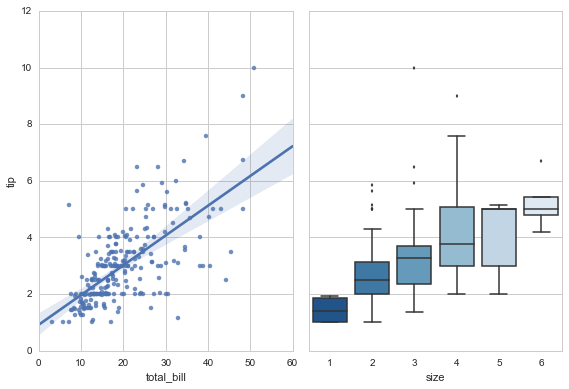

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.regplot("total_bill", "tip", tips, ax=ax1)
sns.boxplot(tips["tip"], tips["size"], color="Blues_r", ax=ax2).set_ylabel("")
f.tight_layout()

### Factor Plots

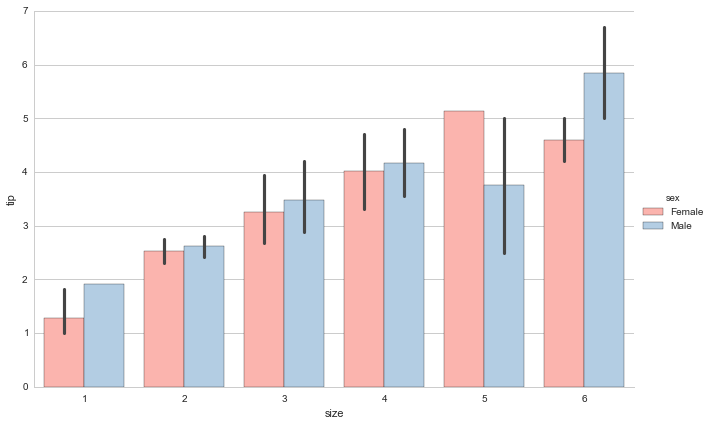

In [22]:
sns.factorplot("size", "tip", "sex", data=tips, size=6, aspect=1.5, palette="Pastel1");

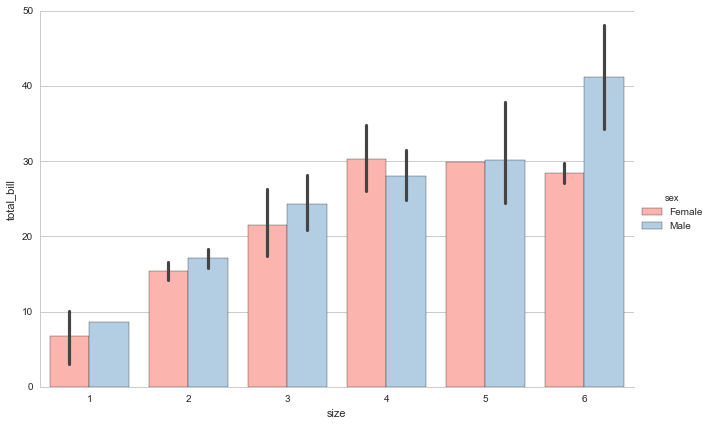

In [23]:
sns.factorplot("size","total_bill", "sex", data=tips, size=6, aspect=1.5, palette="Pastel1");

### Faceted linear model plots

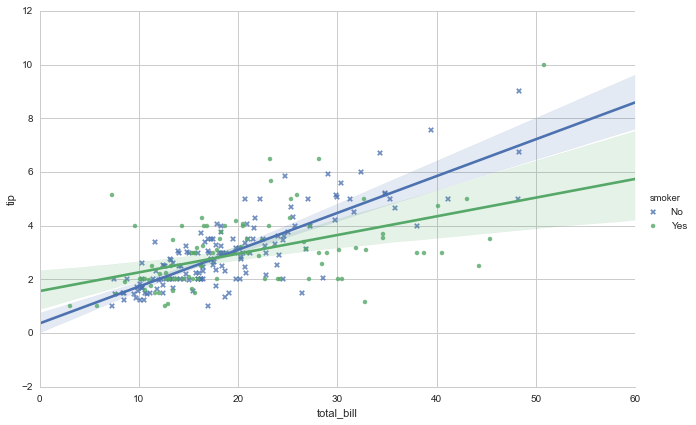

In [24]:
sns.lmplot("total_bill", "tip", tips, hue="smoker",
           size=6, aspect=1.5,markers=["x", "o"]);

Plotting in different columns of a grid also makes a plot that’s easy to understand, although direct comparisons between the subsets are more difficult as the data are separated in space. This might be better when you want the viewer to focus on the relationship within each subset independently.

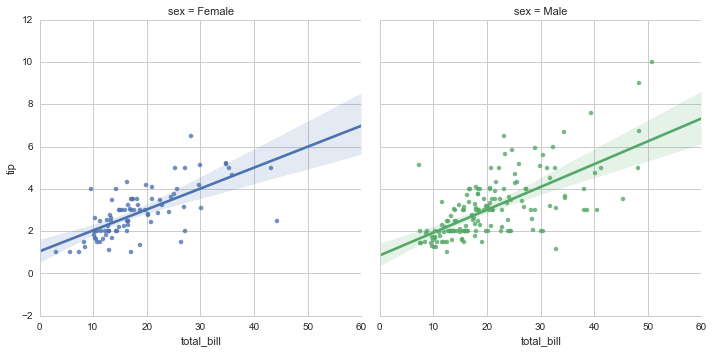

In [25]:
sns.lmplot("total_bill", "tip", tips, col="sex", hue="sex");

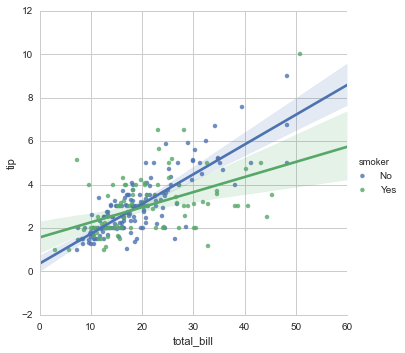

In [26]:
sns.lmplot("total_bill", "tip", tips, hue="smoker");

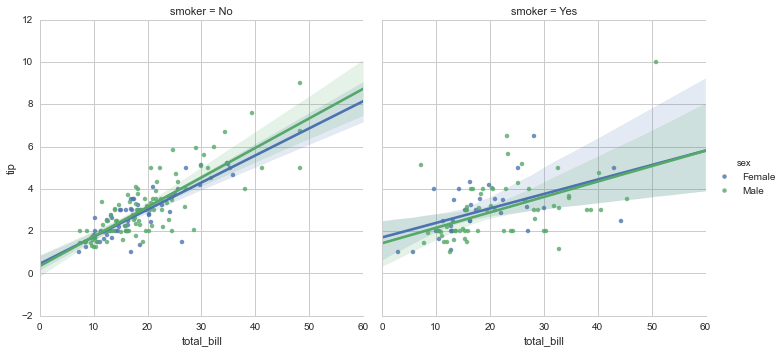

In [27]:
sns.lmplot("total_bill", "tip", tips, col="smoker", hue="sex");

### Plotting different linear relationships¶

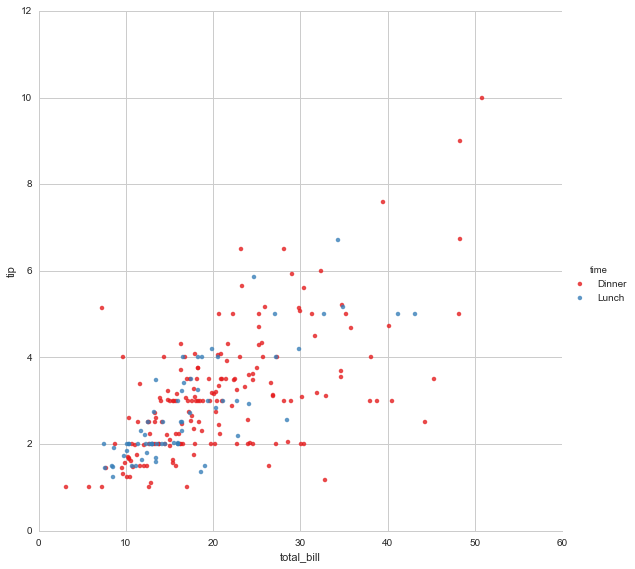

In [28]:
sns.lmplot("total_bill", "tip", tips, hue="time", palette="Set1", size=8, aspect=1, fit_reg=False);

1. For smoking parties, there is a lot less association between the size of the tip and the size of the bill; 
1. When a female non-smoker paid the bill, the tip was a very consistent percentage of the bill, with the exceptions of three dining parties;
1. larger bills were mostly paid by men.

In the above example we gained a wealth of insight in a short time. Using nothing but graphical methods we investigated univariate, bivariate, and multivariate relationships. We found both global features and local detail. We saw that tips were rounded; then we saw the obvious correlation between the tip and the size of the bill, noting the scarcity of generous tippers; finally we discovered differences in the tipping behavior of male and female smokers and non-smokers. In contrast, an old-fashioned approach without graphics would be to fit a regression model. Without subtle regression diagnostics (which rely on graphics!), mmthis approach would miss many of the above insights.

### Residual Plot

The validity of linear models are based on a set of assumptions, several of which are about the distribution of the model residuals. Looking at the residuals of your model can also clue you in to interesting higher-order trends that you might otherwise miss.

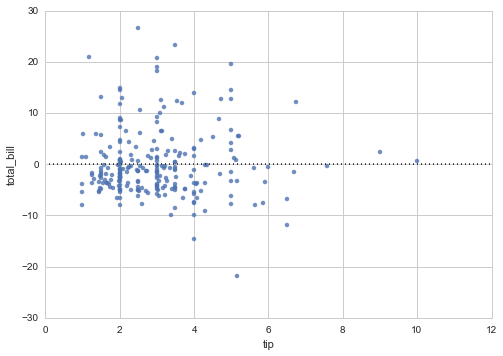

In [29]:
sns.residplot(tips.tip, tips.total_bill);

## Regression

Are we satisfied with this model? We have some doubts about it.

In [30]:
tips['tiprate'] = tips.tip / tips.total_bill

In [31]:
tips['tiprate']

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
5      0.186240
6      0.228050
7      0.116071
8      0.130319
9      0.218539
10     0.166504
11     0.141804
12     0.101816
13     0.162778
14     0.203641
15     0.181650
16     0.161665
17     0.227747
18     0.206246
19     0.162228
20     0.227679
21     0.135535
22     0.141408
23     0.192288
24     0.160444
25     0.131387
26     0.149589
27     0.157604
28     0.198157
29     0.152672
         ...   
214    0.230742
215    0.085271
216    0.106572
217    0.129422
218    0.186047
219    0.102522
220    0.180921
221    0.259314
222    0.223776
223    0.187735
224    0.117735
225    0.153657
226    0.198216
227    0.146699
228    0.204819
229    0.130199
230    0.083299
231    0.191205
232    0.291990
233    0.136490
234    0.193175
235    0.124131
236    0.079365
237    0.035638
238    0.130338
239    0.203927
240    0.073584
241    0.088222
242    0.098204
243    0.159744
Name: tiprate, dtype: fl

In [32]:
from statsmodels.formula.api import ols

results = ols('tip ~ total_bill + size', tips).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 05 Jun 2015   Prob (F-statistic):           9.67e-34
Time:                        11:33:44   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.6689      0.194      3.455      0.001         0.288     1.050
total_bill     0.0927      0.009     10.172      0.000         0.075     0.111
size           0.1926      0.085      2.258      0.025         0.025     0.361
==============================================================================
Omnibus:                       24.753   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.169
Skew:                           0.545   Prob(JB):                     9.43e-11
Kurtosis:                       4.831   Cond. No.                         67.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

However, in this data it explains only 2% of the variation in tip rate. The points are spread widely around the regression line. There are very few data points for parties of size one, five, and six, which makes us question the validity of the model in these regions. The signal is very weak relative to the noise.

### Challenge : EDA on Boston Housing Prices

In [33]:
from sklearn import datasets

boston = datasets.load_boston()

print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [34]:
df = pd.DataFrame(
    np.column_stack([boston.data, boston.target]),
    columns = np.r_[boston.feature_names,['MEDV']]
)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
# Your EDA

![break](assets/theory.png)

## Intermission : Types of Data

### Level of Measurement

#### Nominal

In this scale, categories are nominated names (hence “nominal”). There is no inherent order between categories. Put simply, one cannot say that a particular category is superior/ better than another. These can be either linguistic or numeric. **Nominal numbers** or categorical numbers are numerals used for identification only. The numerical value is irrelevant, and they do not indicate quantity, rank, or any other measurement.

##### Examples

Each category can only be considered as equal to the other.

* **Gender (Male/ Female)**:- One cannot say that Males are better than Females, or vice-versa.
* **Blood Groups (A/B/O/AB)**:- Here, too, the categories cannot be arranged in a logical order.
* **Bus Routes** (101,40,37)**: The _order_ typically isn't relevant, as the number is used for identification purposes only.)

#### Ordinal

The various categories can be logically arranged in a meaningful order. However, the difference between the categories is not “meaningful”. Hence. you cannot do arithmetic with ordinal numbers -- they show sequence only.

##### Examples

* Ranks (1st/ 2nd/ 3rd, etc.): The ranks can be arranged in either ascending or descending order without difficulty. However, the difference between ranks is not the same - the difference between the 1st rank and 2nd rank may be 20 units, but that between the 2nd and 3rd ranks may be 3 units. In addition, it is not possible to say that the 1st rank is x times better than the 2nd or 3rd rank purely on the basis of the ranks.
* Ranks (Good/ Better/ Best), (No pain/ Mild pain/ Moderate pain/ Severe pain): Here, too, a meaningful arrangement (ordering) is possible, but the difference between the categories is subjective and not uniform. “Best” is not necessarily thrice as good as “Good”; or twice as good as “Better”.
* Likert scale (Strongly Disagree/ Disagree/ Neutral/ Agree/ Strongly Agree) : The ordering is flexible - the order can easily be reversed without affecting the interpretation - (Strongly Agree/ Agree/ Neutral/ Disagree/ Strongly Disagree). Again, the difference between categories is not uniform.

#### Interval

Interval data is measured along a scale in which each position is equidistant from one another. This allows for the distance between two pairs to be equivalent in some way. The values (not categories) can be ordered and have a meaningful difference, but doubling is not meaningful. This is because of the absence of an “absolute zero”.

##### Examples

* **The Celsius scale**: The difference between 40 C and 50 C is the same as that between 20 C and 30 C (meaningful difference = equidistant). Besides, 50 C is hotter than 40 C (order). However, 20 C is not half as hot as 40 C and vice versa (doubling is not meaningful).
* **My level of happiness, rated from 1 to 10**: If I rate my happiness as 8, it doesn't mean I am twice as happy as whenever I rate my happiness as 4.

#### Ratio

The values can be ordered, have a meaningful difference, and doubling is also meaningful. There is an “absolute zero”. Ratio data can be multiplied and divided because not only is the difference between 1 and 2 the same as between 3 and 4, but also that 4 is twice as much as 2. Interval and ratio data measure quantities and hence are quantitative.  Because they can be measured on a scale, they are also called scale data.

##### Examples

* **The Kelvin scale**: 100 K is twice as hot as 50 K; the difference between values is meaningful and can be ordered.
* **Weight**: 100 kg is twice as heavy as 50 kg; the difference between 45 kg and 55 kg is the same as that between 105 kg and 100 kg; values can be arranged in an order (ascending/ descending).
* **Height**: 100 cm is taller than 50 cm; this difference is the same as that between 150 cm and 100 cm, or 200 cm and 150 cm; 100 cm is twice as tall as 50 cm; the values can be arranged in a particular manner (ascending/ descending).


| Provides                  | Nominal | Ordinal | Interval | Ratio |
|---------------------------|---------|---------|----------|-------|
| Frequency of Distribution | ✓       | ✓       | ✓        | ✓     |
| Mode, Mean, Percentiles   |         | ✓       | ✓        | ✓     |
| Order                     |         | ✓       | ✓        | ✓     |
| Quantify the difference   |         |         | ✓        | ✓     |
| Add/Subtract Values       |         |         | ✓        | ✓     |
| Multiply/Divide Values    |         |         |          | ✓     |
| True Zero                 |         |         |          | ✓     |

### Continuous vs Discrete

![](assets/continuous.svg)

Continuous measures are measured along a continuous scale which can be divided into fractions, such as temperature. Continuous variables allow for infinitely fine sub-division, which means if you can measure sufficiently accurately, you can compare two items and determine the difference.

Discrete variables are measured across a set of fixed values, such as age in years (not microseconds). These are commonly used on arbitrary scales, such as scoring your level of happiness, although such scales can also be continuous.


![break](assets/theory.png)

## Regression

A regression model is a functional relationship between input & response variables.

The **simple linear regression** model captures a linear relationship between a single input variable x and a response variable y:

$$y = α+βx+ε$$

* $y$ = response variable (the one we want to predict)
* $x$ = input variable (the one we use to train the model)
* $α$ = intercept (where the line crosses the y-axis)
* $β$ = regression coefficient (the model “parameter”)
* $ε$ = residual (the prediction error)

We can extend this model to several input variables, giving us the multiple linear regression model:

$$y = α + β_1x_1 + ... + β_nx_n + ε$$

### Linear Regression in Python is Simple

In [36]:
import numpy as np
data = np.array([[1,1],[2,3],[3,5],[4,8],[5,9.5],[6,13]])

In [37]:
from sklearn.linear_model import LinearRegression
est = LinearRegression()

X = [[x] for x in data[:,0]]
y = data[:,1]

# Train the model
est.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
y

array([  1. ,   3. ,   5. ,   8. ,   9.5,  13. ])

In [39]:
# The intercept and the coefficients
print 'y = %s + %s X' % (est.intercept_, est.coef_[0])

y = -1.66666666667 + 2.35714285714 X


### Cost of Linear Regression

** Q: How do measure error in a linear regression model?**

A: In theory, minimize the sum of the squared residuals
(**RSS**, or **SSE**).

$$SST = \Sigma(y_i-\bar{y})^2$$
$$SSR = \Sigma(\hat{y_i}-\bar{y})^2$$
$$SSE = \Sigma(y_i-\hat{y_i})^2$$

SST = Total Sum of Squared Deviations in $Y$ from its mean $\bar{y}$

SSR = Sum of squares due to regression

SSE = Sum of Squared Residiuals

![](assets/reg4.JPG)

In some cases the total sum of squares equals the sum of the two other sums of squares defined above

$$SST = SSR + SSE$$

In practice, any respectable software can do this for you.

In python, we can find this with some quick code.

In [40]:
import numpy as np

prediction = np.array([1, 2, 3])
actual = np.array([1.12, 1.89, 3.02])
y_bar = actual.mean()

print 'SSE', np.sum((prediction - actual) ** 2)
print 'SSR', np.sum((prediction - y_bar) ** 2)
print 'SST', np.sum((actual - y_bar) ** 2)

SSE 0.0269
SSR 2.0003
SST 1.8266


Or let's see how it works for the model we've just created.

In [41]:
# Actual
data[:,1]

array([  1. ,   3. ,   5. ,   8. ,   9.5,  13. ])

In [42]:
# Predicted
est.predict(X)

array([  0.69047619,   3.04761905,   5.4047619 ,   7.76190476,
        10.11904762,  12.47619048])

In [43]:
y_bar = data[:,1].mean()
prediction = est.predict(X)
actual = data[:,1]

SSE = np.sum((prediction - actual) ** 2)
SSR = np.sum((prediction - y_bar) ** 2)
SST = np.sum((actual - y_bar) ** 2)

print 'SSE', SSE
print 'SSR', SSR
print 'SST', SST

SSE 0.97619047619
SSR 97.2321428571
SST 98.2083333333


$$SST = SSR + SSE$$

In [44]:
round(SST,6) == round(SSE + SSR, 6) 

True

### How do we measure goodness of fit?

We want to have a metric for which we can grow an intuition over time, it therefore needs to be scale-invariant. $R^2$ is such a metric.

In theory, we want to maximize $R^2$ (as close to $1$ as possible).

$$R = 1 - \frac{SSE}{SST}$$

In [45]:
1 - SSE / SST

0.99006000363658397

Scikit Learn already calculates this for us, as do any other stats packages and programs.

In [46]:
# R-squared
est.score(X,y)

0.99006000363658397

In [47]:
1 - SSE / SST == est.score(X,y)

True

However, using  or adjusted  is not sufficient. For example, in the following graph, the fitted curve shown in plot B-D might have a high  value, but apparently the models are wrong. So it is necessary to diagnose the regression result by the Residual Analysis.

![](assets/Goodness_of_Fit.jpg)

So in summary,
$R^2$ explains the portion of the _variance_ in the data which is explained by the model, 

## Polynomial Regression

$$ \displaystyle f(x) = \alpha + \beta_1 \, x + \beta_2 \, x^2 + \beta_3 \, x^3 ... $$ 

A polynomial term–a quadratic (squared) or cubic (cubed) term turns a linear regression model into a curve.  But because it is X that is squared or cubed, not the Beta coefficient, it still qualifies as a linear model.  This makes it a nice, straighforward way to model curves without having to model complicated non-linear models.

In [48]:
%matplotlib inline

#### Import modules and setup the data

In [49]:
import numpy as np
import pylab as pl
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy import interpolate

polynomial = [1,2,3]
color = ['r','b','y']

data = np.array([[-1,-1],
                 [0,3],
                 [1,2.5],
                 [2,5],
                 [3,4],
                 [5,2],
                 [7,5],
                 [9,4]])

X_1 = data[:,0]
y = data[:,1]

#### Build a linear regression model for each polynomial

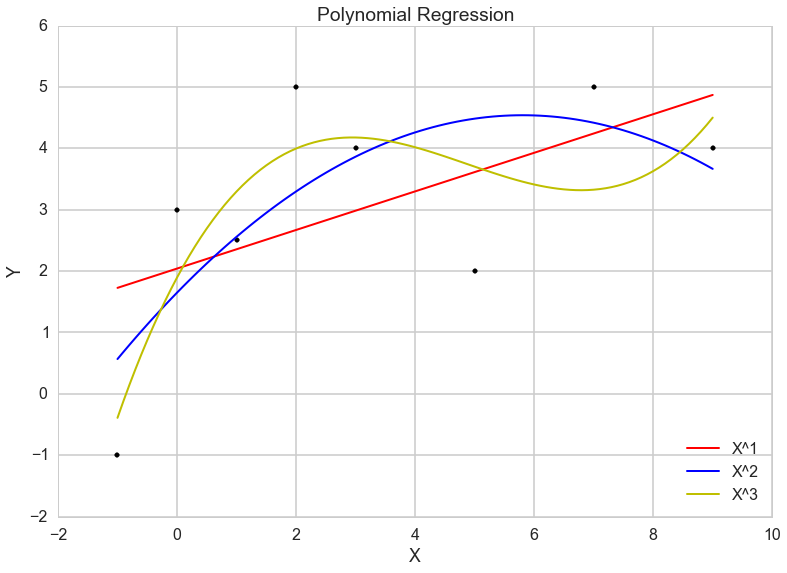

In [50]:
c = 0
with sns.plotting_context("poster"):
    
    ## Setup Plot
    pl.title('Polynomial Regression')
    pl.xlabel('X')
    pl.ylabel('Y')

    ## Iteratate through the polynomials    
    
    for p in polynomial:
        
        # Calculate the polynomial of X_1          
        X = np.zeros((X_1.size,p))
        X[:,0] = X_1
        
        for i in range(1,p):
            X[:,i] = X_1**(i+1)

        # Run the Classifier
        est = LinearRegression()
        est.fit(X, y)

        # Calculate Predicts
        predict = np.array([0.0, 2.0, 8.0])
        X_predict = np.zeros((predict.size, p))
        X_predict[:,0] = predict

        for i in range(1, p):
            X_predict[:,i] = predict**(i+1)

        y_predict = est.predict(X_predict)

        # plot the polynomial regression
        xi = np.linspace(-1, 9, 101)
        m = np.zeros((xi.size,p))

        for i in range(1,p+1):
            m[:,i-1]=xi**i

        pl.plot(xi, est.predict(m), '-' + color[c], linewidth=2)
        c = c + 1

        #plot the predictions
#         pl.plot(X_predict[:,0], y_predict, 'ro')

    # plot the dataset
    pl.scatter(X_1, y, color='black')
    pl.legend(["X^1","X^2","X^3"], loc=4)
    pl.show()

As you can see in the following figure you can get a linear regression (red line) or you can get a non-linear regression (blue and  yellow) if you add more features to your equation. The type of curve of non-linear regression model depends of the grade of your polynomial. If the grade of the polynomial is near 1 the model fits to traditional linear regression model. Instead, if the grade of the polynomial is high the model fits to training points.

### Overfitting

OverFitting is the term that it’s used to describe when your linear regression model don’t have capacity to predict because the model fits very near of the training points. This fact can happen if the model is very complex or the grade of equation is high. You notice that over-fitting is bad for your model and you should avoid it because the predictions will be very similar or equals to the training points.

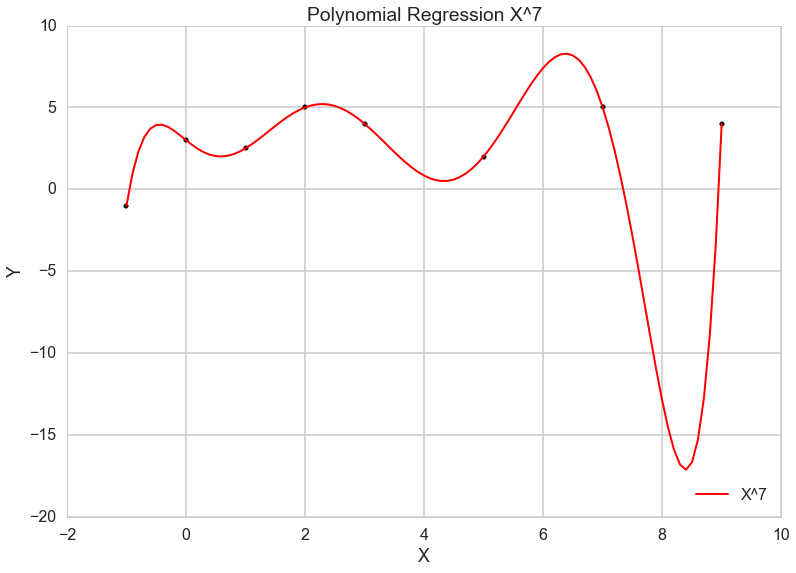

In [51]:
with sns.plotting_context("poster"):
    c = 0
    ## Setup Plot
    pl.title('Polynomial Regression X^7')
    pl.xlabel('X')
    pl.ylabel('Y')

    ## Set the polynomial to 7
    p = 7

    # Calculate the polynomial of X_1          
    X = np.zeros((X_1.size,7))
    X[:,0] = X_1

    for i in range(1,p):
        X[:,i] = X_1**(i+1)

    # Run the Classifier
    clf = LinearRegression()
    clf.fit(X, y)

    # Calculate Predicts
    predict = np.array([0.0, 2.0, 8.0])
    X_predict = np.zeros((predict.size, p))
    X_predict[:,0] = predict

    for i in range(1, p):
        X_predict[:,i] = predict**(i+1)

    y_predict = clf.predict (X_predict)

    # plot the polynomial regression
    xi = np.linspace(-1, 9, 101)
    m = np.zeros((xi.size,p))

    for i in range(1,p+1):
        m[:,i-1]=xi**i

    pl.plot(xi, clf.predict(m), '-' + color[c], linewidth=2)
    c = c + 1
    
#     print clf.score(X,y)

    #plot the predictions
#         pl.plot(X_predict[:,0], y_predict, 'ro')

    # plot the dataset
    pl.scatter(X_1, y, color='black')
    pl.legend(["X^7"], loc=4)
    pl.show()

### Random test/train split

Most approaches that search through training data for empirical relationships tend to overfit the data, meaning that they can identify apparent relationships in the training data that do not hold in general. A test set is a set of data that is independent of the training data, but that follows the same probability distribution as the training data. If a model fit to the training set also fits the test set well, minimal overfitting has taken place. A better fitting of the training set as opposed to the test set usually points to overfitting

![](assets/lecture7-cross-validation-8-638.jpg)

#### Example

![](assets/720px-Traintest.svg.png)

A training set (left) and a test set (right) from the same statistical population are shown as blue points. Two predictive models are fit to the training data. Both fitted models are plotted with both the training and test sets. In the training set, the MSE of the fit shown in orange is 4 whereas the MSE for the fit shown in green is 9. In the test set, the MSE for the fit shown in orange is 15 and the MSE for the fit shown in green is 13. The orange curve severely overfits the training data, since its MSE increases by almost a factor of four when comparing the test set to the training set. The green curve overfits the training data much less, as its MSE increases by less than a factor of 2.

### Using sklearn to generate your train/test split

In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
a, b = np.arange(10).reshape((5, 2)), range(5)

In [54]:
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [55]:
b

[0, 1, 2, 3, 4]

In [56]:
a_train, a_test, b_train, b_test = train_test_split(
    a, b, test_size=0.33, random_state=42)

In [57]:
a_train

array([[4, 5],
       [0, 1],
       [6, 7]])

In [58]:
a_test

array([[2, 3],
       [8, 9]])

In [59]:
b_train

[2, 0, 3]

In [60]:
b_test

[1, 4]

## Training a Regression Model

In [61]:
X = boston['data']   # 13 features (e.g. crime, # rooms, age, etc.)
Y = boston['target'] # response (median house price)

# half of data
half = np.floor(len(Y)/2)
train_X = X[:half]
train_Y = Y[:half]
test_X = X[half:]
test_Y = Y[half:]

# OR

train_X, test_X, train_Y, test_Y = train_test_split(boston['data'], boston['target'], test_size=0.5, random_state=42)

In [62]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [63]:
# fit the model
clf.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# now do the prediction
pred = clf.predict(test_X)

# how well did we do?
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_Y, pred) ; print mse

25.1787128315


Which is more realistic than

In [65]:
mse = mean_squared_error(train_Y, clf.predict(train_X)) ; print mse

19.9801292579


In [66]:
# and .score gives us the R^2
clf.score(test_X,test_Y)
# clf.score(train_X,train_Y)

0.68965079815093722

## Short Detour : Numpy Arrays

The most important and central python package for doing scientific computing is `NumPy`. This package provides convenient and fast arbitrary-dimensional array manipulation routines. The home of NumPy as well as some other scientific packages is:  http://www.scipy.org


The main python object is a **N-dimensional array** data structure. In the following  sections we show different core aspects of this array object.

### Basic properties

The NumPy arrays have three fundamental properties.

- ``shape``: The shape attribute of any arrys describes its size along all of its dimensions
- ``ndim``: The number of dimensions (often also called `directions` or `axes`)
- ``dtype``: The data type of the array elements.

Lets look at some examples to get a feeling for these concepts. At the
very beginning we make sure to import (load) the ``numpy`` python module (package):

In [67]:
from numpy import *   # Import all (top-level) functions from numpy

We can create arrays from (nested) python lists or tuples:

In [68]:
A = array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [69]:
type(A)

numpy.ndarray

This is a simple vector of 5 elements. The type of the array *itself* is ``numpy.ndarray``. The array is one-dimensional as expected:

In [70]:
A.ndim

1

and has the following shape (shapes are always return as python tuples)

In [71]:
A.shape

(5,)

The data type of the *elements* of ``A`` is:

In [72]:
A.dtype

dtype('int64')

But most of the time we don't need to bother us with types. Let's create a simple matrix:

In [73]:
M = array([[1,2,3],[4,5,6]])
M

array([[1, 2, 3],
       [4, 5, 6]])

We should think of matrices simply as two-dimensional arrays:

In [74]:
M.ndim

2

This one having two rows and three columns:

In [75]:
M.shape

(2, 3)

We could define higher-dimensional arrays too but will do this rarely.

### Array creation

There are several other methods to construct arrays beside the initialization by nested lists. Remember that the list can also be a list comprehension:

In [76]:
S = array([i**2 for i in xrange(10)])
S

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

We will learn a much better way later to achieve the same. It is possible to use lambda functions together with nested list comprehensions for advanced matrix constructions. In the following we build a so-called Toeplitz matrix:

In [77]:
arc = lambda r,c: r-c

T = array([[arc(r,c) for c in xrange(4)] for r in xrange(5)])

T

array([[ 0, -1, -2, -3],
       [ 1,  0, -1, -2],
       [ 2,  1,  0, -1],
       [ 3,  2,  1,  0],
       [ 4,  3,  2,  1]])

Often we want to initialize arrays for later use. For example we can create arrays of ``zeros`` or ``ones`` by these two functions of same name:

In [78]:
Z = zeros((12,))
Z

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [79]:
O = ones((3,3))
O

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

If we need ``N`` equally spaced points between two endpoints ``a`` and ``b`` we
can call ``linspace(a, b, N)`` like:

In [80]:
points = linspace(0, 10, 15)
points.shape

(15,)

In [81]:
points

array([  0.        ,   0.71428571,   1.42857143,   2.14285714,
         2.85714286,   3.57142857,   4.28571429,   5.        ,
         5.71428571,   6.42857143,   7.14285714,   7.85714286,
         8.57142857,   9.28571429,  10.        ])

If we need only some integer ranges, we can either convert the result of Python's ``range`` or directly call NumPy's ``arange`` (remember that the last point is always *excluded* in ranges but *included* in the result of ``linspace``):

In [82]:
array(range(5,13))

array([ 5,  6,  7,  8,  9, 10, 11, 12])

In [83]:
arange(5,13)

array([ 5,  6,  7,  8,  9, 10, 11, 12])

For computing a two-dimensional grid of points there is the ``meshgrid`` command.

We show only a small example here:

In [84]:
x = linspace(0, 3, 4)
x

array([ 0.,  1.,  2.,  3.])

In [85]:
y = linspace(0, 2, 3)
y

array([ 0.,  1.,  2.])

In [86]:
X,Y = meshgrid(x,y)
X

array([[ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.]])

In [87]:
Y

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.]])

Meshgrids are commonly used for plotting in three dimensions.

Sometimes we already have an array and want to create another one with *same shape*.
For this we have the functions ``zeros_like`` and ``ones_like`` at hand:

In [88]:
zeros_like(T)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [89]:
ones_like(A)

array([1, 1, 1, 1, 1])

Finally, from time to time we need random numbers. There are powerful methods for filling arrays with random numbers. The most simple call looks like:

In [90]:
random.random((3,5))

array([[ 0.64961057,  0.3337719 ,  0.84327757,  0.86977346,  0.63884352],
       [ 0.66529625,  0.69916007,  0.46961361,  0.78328359,  0.8997063 ],
       [ 0.1796127 ,  0.01372478,  0.75099519,  0.54275219,  0.20803487]])

and gives us values according to the continuous uniform distribution.

### Indexing and Slicing

Indexing some single value or even a whole set of values from a given array is the next important operation we need to learn about.

Indexing for retrieving single elements works as usual in python and indexing by negative numbers starts counting from the end:

In [91]:
l = arange(9)
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [92]:
l[3]

3

In [93]:
l[-2]

7

We run into ``IndexError`` exceptions if we try to access elements not available:

In [94]:
try:
    l[9]
except IndexError,e:
    print e

index 9 is out of bounds for axis 0 with size 9


In [95]:
try:
    l[-10]
except IndexError,e:
    print e

index -10 is out of bounds for axis 0 with size 9


In general we have to index an array ``A`` with as many indices as there are dimensions (There are some more or less esoteric exceptions).

In [96]:
A = eye(4)
A

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [97]:
A[0,0]

1.0

In [98]:
A[0,3]

0.0

In [99]:
try:
    A[1,1,1]
except IndexError,e:
    print e

too many indices for array


In principle we can also index ``A`` by just one value and get:

In [100]:
A[1]

array([ 0.,  1.,  0.,  0.])

we will learn later how to interpret this result. In any case you should be very careful with such things.

### Slicing

The term *slicing* is used for extracting whole rows, columns or other rectangular (hypercubic) subregions from an arbitrary dimensional array.
One can easily select the colored regions from the following images.

![](assets/slice_row_col.png)

We can extract (slice out) single rows or columns by indexing with colons;

In [101]:
A = array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [102]:
r1 = A[1,:]   # Get the second row (indexing starts at 0)

In [103]:
r1

array([5, 6, 7, 8])

In [104]:
r1.shape

(4,)

In [105]:
c2 = A[:,2]   # Get the third column (indexing starts at 0)

In [106]:
c2

array([ 3,  7, 11])

In [107]:
c2.shape

(3,)

Now we can also understand what ``A[1]`` does:

In [108]:
A[1]

array([5, 6, 7, 8])

If we provide too less indices, then NumPy appends as many ``:`` as necessary to the *end* of the given index (tuple).

Its possible to select more that one row or column at once.

![](assets/slice_rows_cols.png)

The syntax stays the same:

In [109]:
A[:,0:3]   # The first three columns

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [110]:
A[1:3,:]   # The second two rows

array([[ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [111]:
A[1:3,1:3]   # A submatrix slice

array([[ 6,  7],
       [10, 11]])

What if we want to select a non-contiguous block, like shown in the next image.

![](assets/slice_multi.png)

Select all orange columns? Select all blue rows? Or even all green elements? This is also possible, we just have to use tuple notation:

In [112]:
A[:, (0,2,3)]

array([[ 1,  3,  4],
       [ 5,  7,  8],
       [ 9, 11, 12]])

In [113]:
A[(0,1),:]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

The major caveat here is the following:

In [114]:
A[(0,1),(0,3)]   # What? Why did we not get 4 elements?

array([1, 8])

In [115]:
try:
    A[(0,1),(0,2,3)]
except IndexError, e:
    print e

shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 


It is even possible to use *arrays* to index other arrays like in the following example:

In [116]:
i = array([0,2])

In [117]:
A[:,i]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [118]:
A[i,:]

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

This is the key to solve our failed index example from above. We can indeed select the 6 non-contiguous single elements and get the result packet into a two-dimensional array:

In [119]:
u=array([[0,1]])
u

array([[0, 1]])

In [120]:
v=array([[0],[2],[3]])

In [121]:
A[u,v]

array([[1, 5],
       [3, 7],
       [4, 8]])

As a last example lets look at so called *boolean indexing* where we select mmall elements having some common property:

In [122]:
a = array([[0, 1, 2, 3, 4]])
a

array([[0, 1, 2, 3, 4]])

In [123]:
A = a * transpose(a)
A

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [124]:
A[A>=6]   # Select all elements from A that are larger than 6

array([ 6,  8,  6,  9, 12,  8, 12, 16])

### Array manipulation

We can stack together arrays (with matching shapes of course) along the first (rows) or second (columns) axes:

In [125]:
A = arange(4)

In [126]:
B = vstack([A,A,A])
B

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [127]:
C = array([[1,2],[3,4]])
C

array([[1, 2],
       [3, 4]])

In [128]:
D = hstack([C,C])
D

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

You can also more generically use the `concatenate` function

In [129]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [130]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

Another useful operation is *reshaping* of arrays. The condition for this operation is that both shapes will result in the same number of elements.

In [131]:
B.reshape((6,2))

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

Note that the elements get filled in in row-wise order or more general the elements are taken along the last axes first. In the extreme case we can make the array with a singular dimension:

In [132]:
B.reshape((12,1))

array([[0],
       [1],
       [2],
       [3],
       [0],
       [1],
       [2],
       [3],
       [0],
       [1],
       [2],
       [3]])

In [133]:
E = B.reshape((12,1))
E.shape

(12, 1)

In [134]:
E.ndim

2

Note that ``E`` is still two-dimensional but with shape 1 along the
second axis (this is called a singular dimension). This can be
inconvenient in some cases (for example for plotting as we will see
later). The solution to this is called ``squeeze`` and removes all
singular dimensions of an array:

In [135]:
F = squeeze(E)
F

array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])

In [136]:
F.ndim

1

In [137]:
F.shape

(12,)

In [138]:
oneelem = array([[5]])   # A matrix with one single element
oneelem

array([[5]])

In [139]:
oneelem.ndim

2

In [140]:
oneelem.shape

(1, 1)

In [141]:
scalar = squeeze(oneelem)
scalar.shape

()

In [142]:
scalar.ndim

0

In [143]:
scalar

array(5)

### Operation on Arrays

Until now we have only worked with arrays as structured data containers.
Usually we want to work with the the data inside too.

Arrays support all basic arithmetic operation out of the box:

In [144]:
a = arange(4)

In [145]:
a

array([0, 1, 2, 3])

In [146]:
a+a

array([0, 2, 4, 6])

In [147]:
a-a

array([0, 0, 0, 0])

In [148]:
a*a

array([0, 1, 4, 9])

In [149]:
a/a

array([0, 1, 1, 1])

## Challenge : Build a regression model for the Tips dataset

In [150]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tiprate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Answer the following questions:
   
1. Using Exploratory Data Analysis, establish whether a linear model would help in explaining the `total_bill`

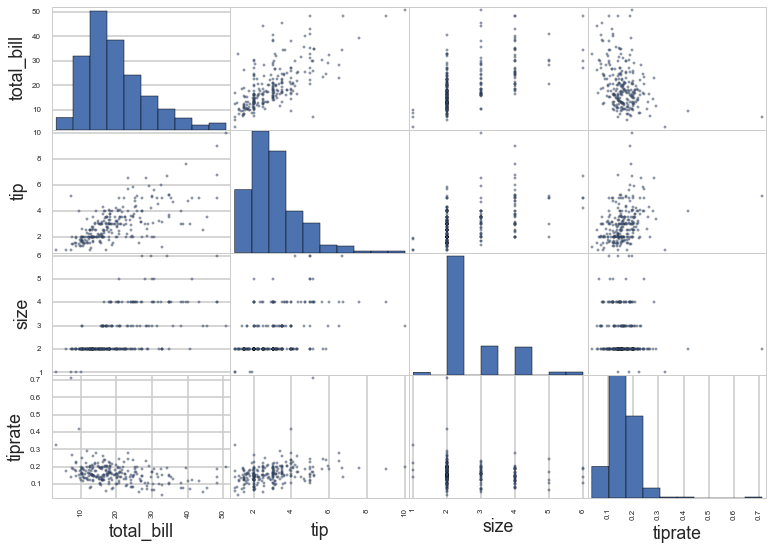

In [151]:
with sns.plotting_context(context='poster'):
    pd.scatter_matrix(tips);

2. What features are most indicative of the `total_bill`?
3. How much do each of the features contribute respectively?
4. If you wanted to add 'categorical' variables like `smoker`, `day` or `time`, how would want to do that?
    1. Could you make use of the [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder) or would the [LabelBinarizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer) be more appropriate? What about  [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) ?
    2. Do  you want to rerun your EDA with the new features to see how they compare?
5. Would it make sense to build a model using Polynomials based on your EDA? If so, SciKit-Learn has a feature called [PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) which helps you generate polynomial features.
6. How did you evaluate your model? How well did it perform?

### Some Illustrated Examples with Seaborn

In [152]:
tips = sns.load_dataset("tips")

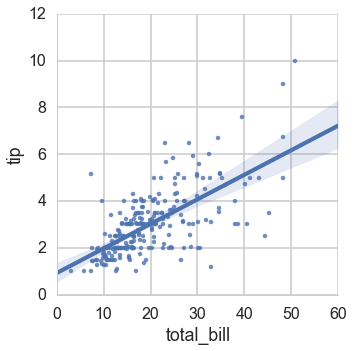

In [153]:
with sns.plotting_context("poster"):
    sns.lmplot("total_bill", "tip", tips);

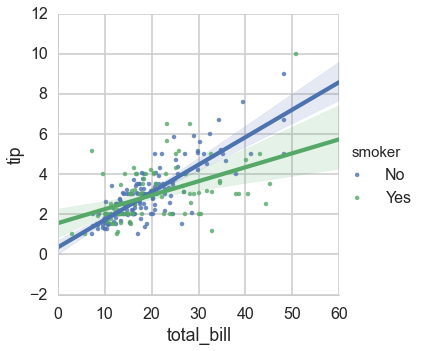

In [154]:
with sns.plotting_context("poster"):
    sns.lmplot("total_bill", "tip", tips, hue="smoker");

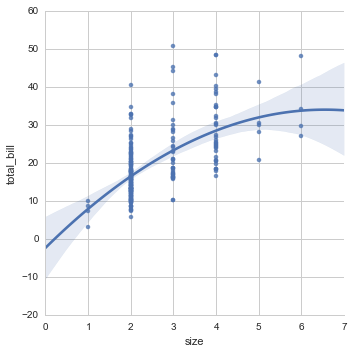

In [155]:
sns.lmplot("size", "total_bill", tips, order=2);